In [ ]:
from pydub import AudioSegment

# Load the MP4 file
mp4_file = "./Data/Music Delta - Rock.stem.mp4"  
audio = AudioSegment.from_file(mp4_file, format="mp4")

# Export as WAV
wav_file = "./Data/Music Delta - Rock.stem.wav"  
audio.export(wav_file, format="wav")

print(f"Converted {mp4_file} to {wav_file}")

Converted ./Data/Music Delta - Rock.stem.mp4 to ./Data/Music Delta - Rock.stem.wav


/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_15144/4219011271.py:35: RuntimeWarning: invalid value encountered in divide
  masks = [mask / np.sum(masks, axis=0) for mask in masks]  # Normalize masks


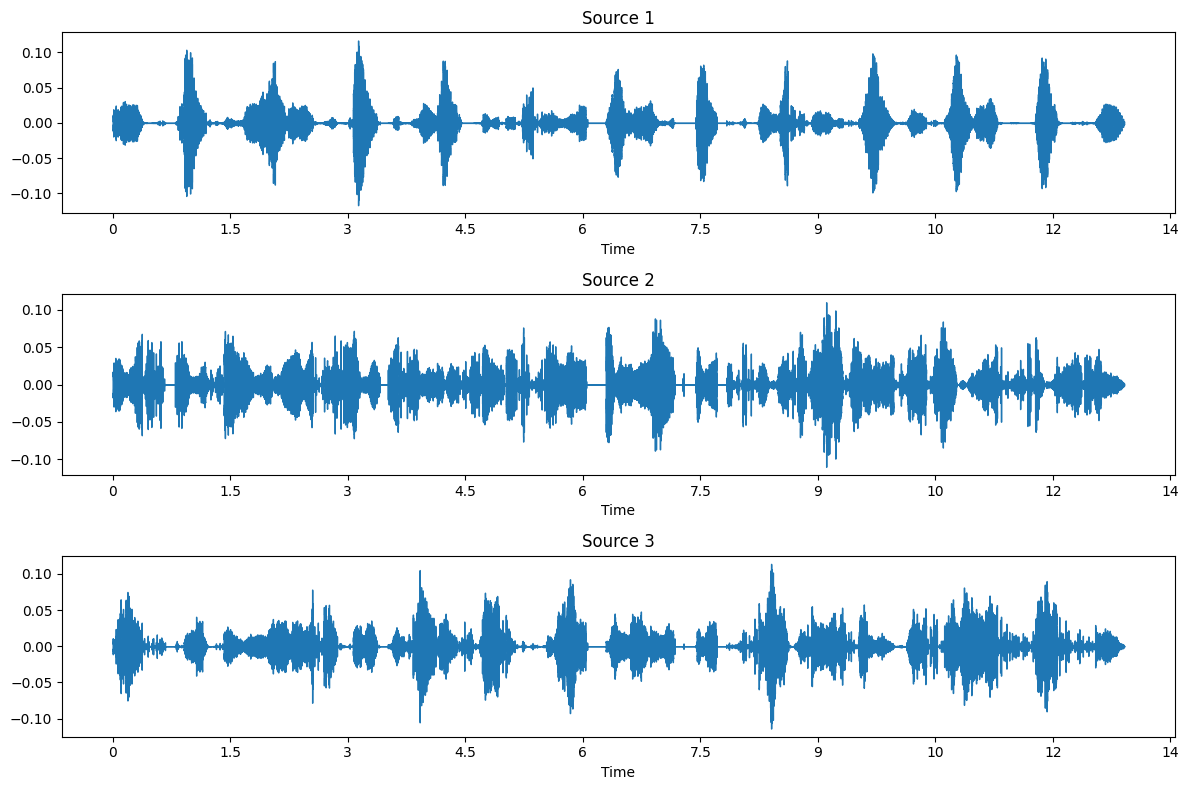

Separated sources saved as 'source_1.wav', 'source_2.wav', etc.


In [ ]:
# Naive approach to separate sources using NMF; functional but requires tuning

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import soundfile as sf 

# Load the single-channel WAV file
file_path = "./Data/Music Delta - Rock.stem.wav"  # Replace with your WAV file path
y, sr = librosa.load(file_path, mono=True)

# Compute the Short-Time Fourier Transform (STFT)
S = np.abs(librosa.stft(y))

# Apply logarithmic scaling to the magnitude spectrogram
# S = np.log1p(np.abs(librosa.stft(y)))

# Alternatively, compute the Mel spectrogram
# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# S = np.log1p(S)  # Apply log scaling

# Apply Non-Negative Matrix Factorization (NMF)
n_components = 3  # Number of sources to separate
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(S)  # Basis matrix
H = model.components_  # Activation matrix

# Reconstruct the sources
# sources = []
# for i in range(n_components):
#     S_i = np.outer(W[:, i], H[i, :])  # Reconstruct each source
#     y_i = librosa.istft(S_i)  # Inverse STFT to get time-domain signal
#     sources.append(y_i)

# Reconstruct the sources with binary masking
masks = [np.outer(W[:, i], H[i, :]) for i in range(n_components)]
masks = [mask / np.sum(masks, axis=0) for mask in masks]  # Normalize masks
S_sources = [S * mask for mask in masks]  # Apply masks to the original spectrogram

# Convert each source back to the time domain, ensuring finite values
sources = [np.nan_to_num(librosa.istft(S_i)) for S_i in S_sources]

# Plot the separated sources
plt.figure(figsize=(12, 8))
for i, source in enumerate(sources):
    plt.subplot(n_components, 1, i + 1)
    librosa.display.waveshow(source, sr=sr)
    plt.title(f"Source {i + 1}")
plt.tight_layout()
plt.show()

# Save the separated sources as WAV files
for i, source in enumerate(sources):
    sf.write(f"./Output/source_{i + 1}.wav", source, sr)

print("Separated sources saved as 'source_1.wav', 'source_2.wav', etc.")